<a href="https://colab.research.google.com/github/melencith/Challenge-1---Data-Science---Alura-Store_-Latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importación de datos**



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4}

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#**1. Análisis de facturación**



In [3]:
facturacion = {}

for nombre, datos_tienda in tiendas.items():
    facturacion[nombre] = datos_tienda["Precio"].sum()

facturacion_dt = pd.DataFrame.from_dict(facturacion, orient='index', columns=["Facturación Total"])
facturacion_dt["Facturación Total"] = facturacion_dt["Facturación Total"].map("{:,.0f}".format)

facturacion_dt



,Facturación Total
Tienda 1,"1,150,880,400"
Tienda 2,"1,116,343,500"
Tienda 3,"1,098,019,600"
Tienda 4,"1,038,375,700"


# **2. Ventas por categoría**

In [4]:
categorias = {}

for nombre, datos_tienda in tiendas.items():
    categorias[nombre] = datos_tienda["Categoría del Producto"].value_counts()

categorias_dt = pd.DataFrame(categorias).fillna(0)
categorias_dt


,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


In [5]:
print("🥇 Categoría más vendida (Top 1) por Tienda:")
top_categorias = categorias_dt.idxmax()
conteo_top = categorias_dt.max()

# Se crea un DataFrame de resumen del Top 1
df_top_1 = pd.DataFrame({
    'Categoría Más Vendida': top_categorias,
    'Cantidad de Ventas': conteo_top
})

df_top_1

🥇 Categoría más vendida (Top 1) por Tienda:


,Categoría Más Vendida,Cantidad de Ventas
Tienda 1,Muebles,465
Tienda 2,Muebles,442
Tienda 3,Muebles,499
Tienda 4,Muebles,480


# **3. Calificación promedio de la tienda**


In [6]:
calificaciones = {}

for nombre, datos_tienda in tiendas.items():
    calificaciones[nombre] = datos_tienda["Calificación"].mean()

calificaciones_dt = pd.DataFrame.from_dict(calificaciones, orient='index', columns=["Calificación Total"])
calificaciones_dt["Calificación Total"] = calificaciones_dt["Calificación Total"].map("{:,.2f}".format)

calificaciones_dt

,Calificación Total
Tienda 1,3.98
Tienda 2,4.04
Tienda 3,4.05
Tienda 4,4.00


# **4. Productos más y menos vendidos**

In [7]:
productos = {}

for nombre, datos_tienda in tiendas.items():
    productos[nombre] = datos_tienda["Producto"].value_counts()

productos_dt = pd.DataFrame(productos).fillna(0)
productos_dt

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Producto,,,,
Ajedrez de madera,49,45,47,39
Armario,60,54,49,34
Asistente virtual,40,38,39,50
Auriculares,50,37,43,44
Auriculares con micrófono,33,44,39,42
Balón de baloncesto,55,42,50,50
Balón de voleibol,42,46,48,48
Batería,53,61,41,48
Bicicleta,54,45,52,45


In [8]:
print("🥇 Productos más vendidos y menos vendidos por Tienda:")
top_productos = productos_dt.idxmax()
bas_productos = productos_dt.idxmin()

# Se crea un DataFrame de resumen del Top
df_top_bas = pd.DataFrame({
    'Producto más vendido': top_productos,
    'Producto menos vendido': bas_productos
})

df_top_bas

🥇 Productos más vendidos y menos vendidos por Tienda:


,Producto más vendido,Producto menos vendido
Tienda 1,Armario,Auriculares con micrófono
Tienda 2,Iniciando en programación,Juego de mesa
Tienda 3,Kit de bancas,Bloques de construcción
Tienda 4,Cama box,Guitarra eléctrica


# **5. Envío promedio por tienda**

In [9]:
envíos = {}

for nombre, datos_tienda in tiendas.items():
    envíos[nombre] = datos_tienda["Costo de envío"].mean()

envíos_dt = pd.DataFrame.from_dict(envíos, orient='index', columns=["Envío Total"])
envíos_dt["Envío Total"] = envíos_dt["Envío Total"].map("{:,.2f}".format)

envíos_dt

,Envío Total
Tienda 1,"26,018.61"
Tienda 2,"25,216.24"
Tienda 3,"24,805.68"
Tienda 4,"23,459.46"


# **6. Generando gráfico**

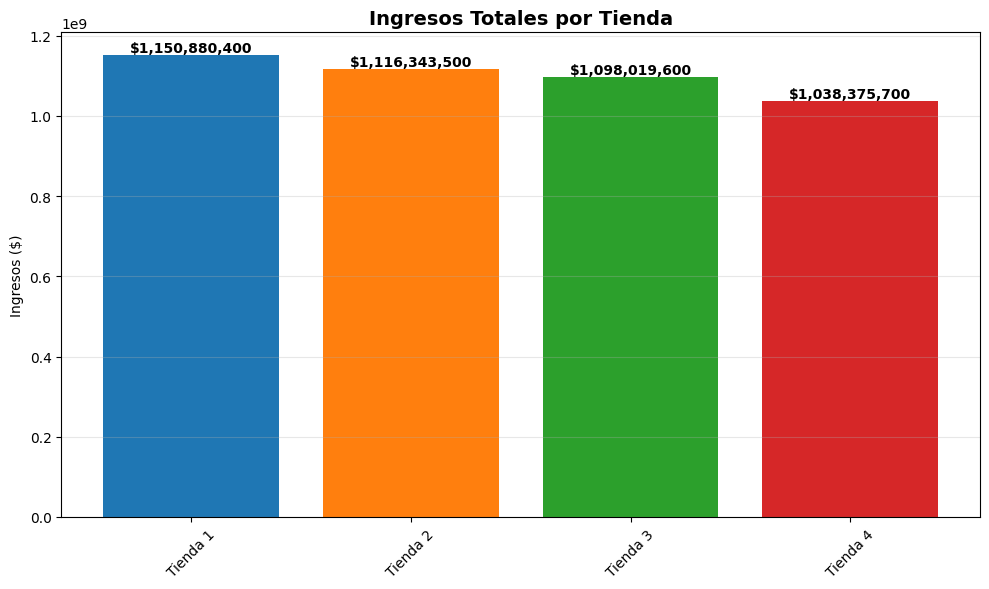

In [47]:
# Gráfico de barras para comparar facturación
plt.figure(figsize=(10, 6))
bars = plt.bar(facturacion.keys(), facturacion.values(),
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.title('Ingresos Totales por Tienda', fontweight='bold', fontsize=14)
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Agregar los valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom',
             fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

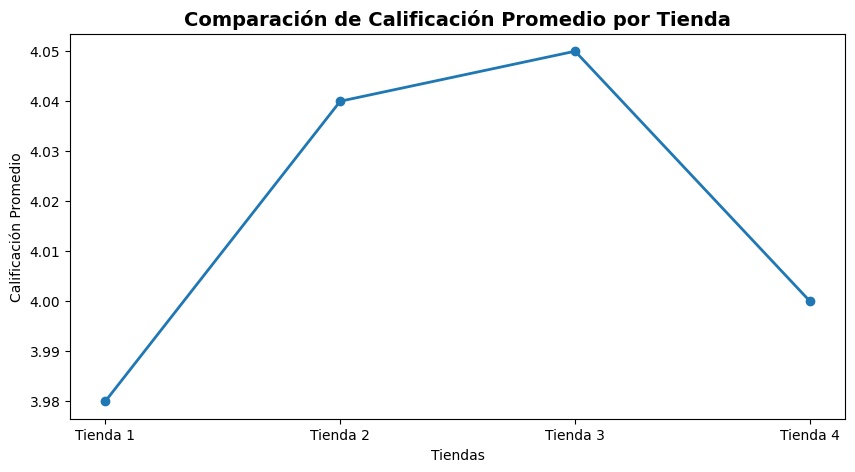

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(
    calificaciones_dt.index,
    calificaciones_dt["Calificación Total"].astype(float),
    marker='o',
    linewidth=2
)

plt.title("Comparación de Calificación Promedio por Tienda", fontweight='bold', fontsize=14)
plt.xlabel("Tiendas")
plt.ylabel("Calificación Promedio")
plt.show()

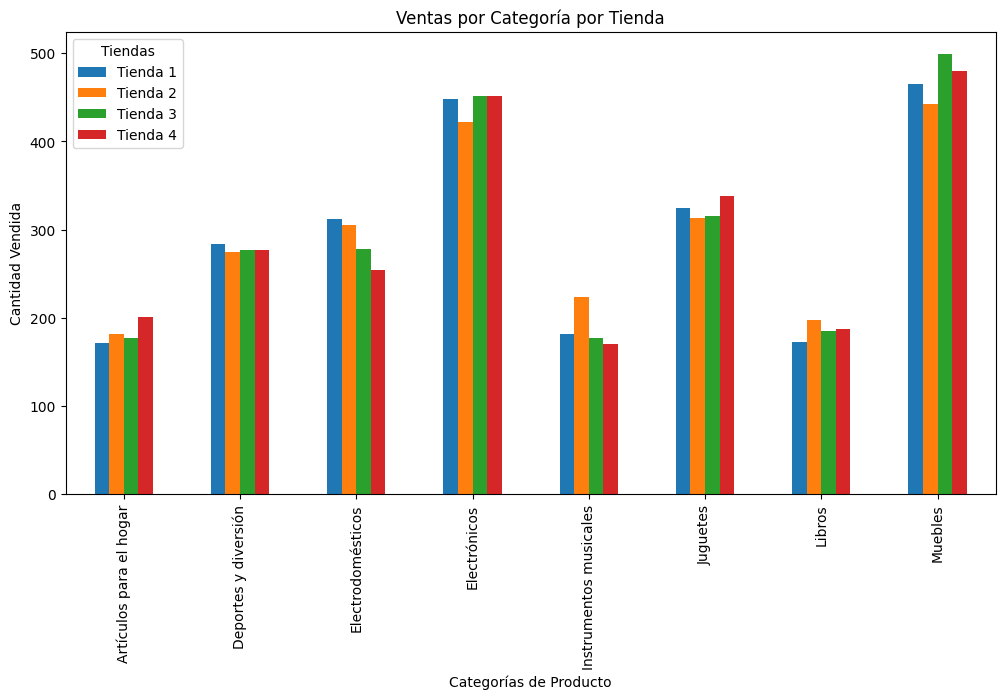

In [46]:
categorias_dt.plot(kind="bar", figsize=(12,6))

plt.title("Ventas por Categoría por Tienda")
plt.xlabel("Categorías de Producto")
plt.ylabel("Cantidad Vendida")
plt.legend(title="Tiendas")
plt.show()

# **7. Informe Final**

## **1. Introducción**

El objetivo de este análisis es apoyar al Sr. Juan en la decisión estratégica de vender una de las cuatro tiendas de su cadena Alura Store para financiar un nuevo emprendimiento.
Para ello, se evaluaron métricas claves que permiten medir el rendimiento global de cada tienda:

- Facturación total
- Ventas por categoría
- Productos más y menos vendidos
- Calificación promedio
- Envío promedio

Además, se generaron visualizaciones que permiten comparar fácilmente las tiendas y detectar fortalezas y debilidades.
Con base en estos análisis, se determina cuál es la tienda con el rendimiento menos eficiente y la mejor candidata para ser vendida.

## **2. Desarrollo del Análisis**

### **2.1. Facturación Total**

El análisis de facturación mostró que:

- Tienda 1 → Mayor facturación
- Tienda 2 → Segundo lugar, con un nivel de ingresos sólido.
- Tienda 3 → Facturación cercana a la Tienda 2, mostrando un buen desempeño.
- Tienda 4 → Menor facturación del grupo

Esto indica que la Tienda 4 genera menos ingresos que las demás, lo que sugiere un menor rendimiento económico y una menor capacidad de crecimiento frente a sus competidoras.

### **2.2. Ventas por Categoría**

El análisis por categorías mostró que todas las tiendas manejan un perfil de ventas relativamente similar, aunque:

- Las categorías más fuertes suelen ser Electrónicos y Muebles.
- Las categorías más débiles son Libros y Juguetes.
- La Tienda 3 destaca con los mayores volúmenes de venta en las categorías de mayor valor, lo que la posiciona como una de las más competitivas del conjunto, seguida de cerca por la Tienda 4

### **2.3. Calificación Promedio**

Las calificaciones promedio por tienda muestran lo siguiente:

- Tienda 3 → Obtiene la mejor calificación promedio, reflejando una alta satisfacción de los clientes.
- Tienda 2 → Muy cercana al primer lugar, con evaluaciones estables y positivas.
- Tienda 4 → Presenta una calificación ligeramente menor, aunque sigue siendo buena.
- Tienda 1 → Registra la calificación más baja del grupo, lo que sugiere una menor satisfacción respecto a las demás.

Estas diferencias pueden estar relacionadas con aspectos como la calidad del servicio, tiempos de entrega, atención al cliente o experiencia postventa.

### **2.4. Productos más y menos vendidos**

El análisis de los productos vendidos evidenció que:

- Las tiendas 1, 2 y 3 poseen un volumen de ventas más equilibrado y con mayor variedad de productos exitosos.
- La Tienda 4 muestra menor movimiento en varias categorías, lo que afecta su facturación.

Esto refleja una menor rotación, menos oportunidades de mercado y un desempeño comercial más débil en comparación con el resto.

### **2.5. Envío Promedio**

En el análisis del costo de envío, se observó que:

- La Tienda 4 registra el costo de envío más bajo del grupo.
- Las Tiendas 3 y 2 presentan valores intermedios y relativamente competitivos.
- La Tienda 1 muestra el costo de envío más alto, lo que la posiciona como la menos competitiva en este aspecto.

En conjunto, la Tienda 4 ofrece una ventaja en costos operativos, mientras que la Tienda 1 podría estar en desventaja frente a sus competidoras debido a sus mayores costos de envío.

## **3. Conclusión**

Después de analizar todos los indicadores clave y revisar las visualizaciones generadas, se concluye que las cuatro tiendas presentan comportamientos diferenciados en términos de ingresos, variedad de ventas, satisfacción del cliente y costos operativos. Sin embargo, los resultados muestran con claridad que la Tienda 4 es la que presenta el desempeño más débil dentro del grupo.

##### **Principales debilidades identificadas en la Tienda 4**

- Menor facturación total, reflejando un nivel de ingresos significativamente inferior al de las otras tiendas.
- Menor rotación de productos, especialmente en categorías estratégicas y de mayor valor.
- Portafolio menos competitivo, con menos productos destacados como “más vendidos” frente a las demás tiendas.
- Calificación promedio más baja, lo que evidencia una menor satisfacción por parte de los clientes.
- Aunque presenta el menor costo de envío, este factor no logra compensar sus debilidades comerciales ni mejorar su posicionamiento.

##### **Comparación general con las otras tiendas**

- Tienda 1: Cuenta con la mayor facturación, pero su calificación es la más baja, lo que indica oportunidades de mejora en servicio.
- Tienda 2: Mantiene un buen equilibrio entre ingresos, rotación de productos y satisfacción del cliente.
- Tienda 3: Se posiciona como la más sólida en términos integrales: buenas ventas, alto rendimiento por categoría y la mejor calificación promedio.


## **Recomendación Final**

Tomando en cuenta el análisis cuantitativo (facturación, ventas por categoría, rotación, calificaciones, costos operativos) y cualitativo (desempeño general y competitividad), la mejor decisión para el Sr. Juan es vender la **Tienda 4**.

Esta tienda:

- Tiene el peor desempeño global en los indicadores más relevantes.
- Aporta menos rentabilidad y menor potencial de crecimiento.
- Requiere mayor inversión para mejorar su competitividad, lo cual podría no ser rentable.

Por el contrario, mantener las Tiendas 1, 2 y 3 permitirá conservar las unidades con mayor estabilidad, mejor reputación y mejores resultados financieros, asegurando la sostenibilidad del negocio en el mediano y largo plazo.